## Assignment 3, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections
from pprint import pprint
import random

In [2]:
# Read the edge list from the file 
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)

In [11]:
def ring_lattice_edges(nodes, k):
    half = k // 2
    n = len(nodes)
    for i, v in enumerate(nodes):
        for j in range(i+1, i+half+1):
            w = nodes[j % n]
            yield v, w

In [12]:
import networkx as nx

def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = ring_lattice_edges(nodes, k)
    G.add_edges_from(edges)
    return G

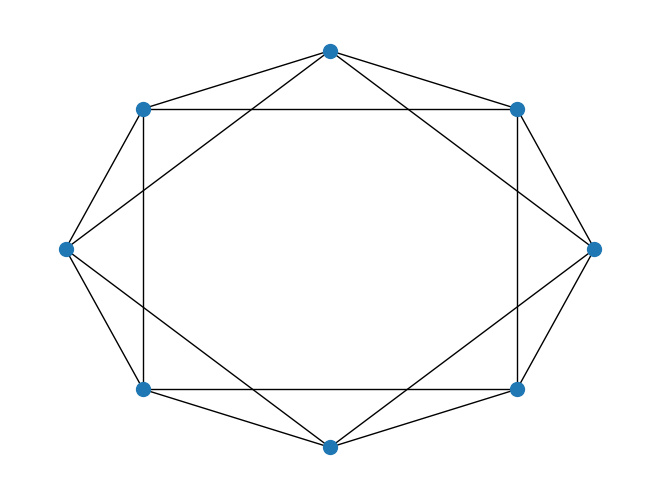

In [13]:
import matplotlib.pyplot as plt

G = make_ring_lattice(8, 4)
nx.draw_circular(G, node_size=100)
plt.show()

In [14]:
import random

def rewire(G, p):
    for v, w in G.edges():
        if random.random() < p:
            G.remove_edge(v, w)
            choices = set(G) - {v} - set(G[v])
            new_w = random.choice(list(choices))
            G.add_edge(v, new_w)

In [15]:
def watts_strogatz_graph(n, k, p):
    G = make_ring_lattice(n, k)
    rewire(G, p)
    return G

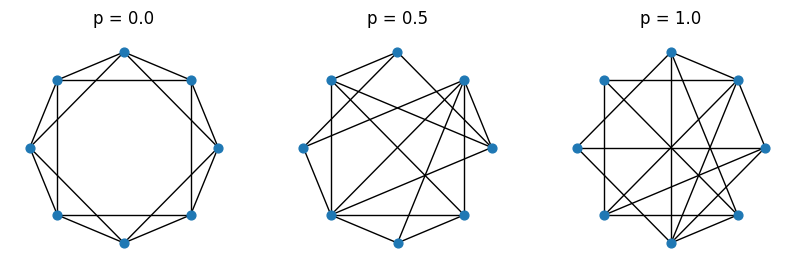

In [21]:
import matplotlib.pyplot as plt

n = 8
k = 4
ps = [0 ,0.5, 1]
fig = plt.figure(figsize=(10, 3))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    G = watts_strogatz_graph(n, k, ps[i])
    ax.set_title('p = %.1f' % ps[i])
    nx.draw_circular(G, node_size=40)
plt.show()

## (a) Generate graphs based on Watts-Strogatz Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of ¯k and p. Please plot the graph structures, degree distributions, and clustering coefficients as well.


## (b) Generate scale-free graphs, and each of them should have the same number of nodes as FacebookEgo. Please generate 3 graphs with three different values of γ. Please plot the graph structures, degree distributions, and clustering coefficients as well.


## (c) Generate graphs based on Barab´asi-Albert Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of m0 and m. Please plot the graph structures, degree distributions, and clustering coefficients as well.


## (d) Please compare your Facebook-Ego network, Twitter-Ego network with the generated random graphs in (a), (b) and (c). Which random graph(s) approximates your networks at most? Why?
